# Aditya Goswami

## Research question/interests

### Through a comparative analysis of the housing index across various provinces and time periods in a given dataset, which provinces and months exhibited the highest cost of living? ###

For answering the question I'll have to work on the monthly index dataset and compare the values of the housing index throughout the years, grouping them by different provinces. Finding which months were the costliest to live in and which provinces saw a hike in prices in a particular year. My visualization would mostly include the comparison of the index value VS the provinces and the months.


In [99]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [89]:
def load_and_process(url):
    df = (pd.read_csv(url)
          .rename(columns={'GEO':'PLACE', 'REF_DATE':'DATE', 'New housing price indexes': 'PLOT'})
          .drop(columns=["DGUID", "UOM", "UOM_ID", "SCALAR_ID","SCALAR_FACTOR", "COORDINATE", 'TERMINATED', 'SYMBOL', 'STATUS', 'DECIMALS', 'VECTOR'])
         )
    df = df[df['PLOT'] == "Total (house and land)"]
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['MONTH'] = df['DATE'].dt.month
    return df

In [90]:
df_index= load_and_process("../data/raw/Montly Data/Montly-index.csv")

In [91]:
df_index

,DATE,PLACE,PLOT,VALUE,MONTH
0,1981-01-01,Canada,Total (house and land),38.2,1
3,1981-01-01,Atlantic Region,Total (house and land),NaN,1
6,1981-01-01,Newfoundland and Labrador,Total (house and land),NaN,1
9,1981-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),36.1,1
12,1981-01-01,Prince Edward Island,Total (house and land),NaN,1
...,...,...,...,...,...
60465,2022-12-01,"Edmonton, Alberta",Total (house and land),109.5,12
60468,2022-12-01,British Columbia,Total (house and land),127.6,12
60471,2022-12-01,"Kelowna, British Columbia",Total (house and land),123.4,12
60474,2022-12-01,"Vancouver, British Columbia",Total (house and land),128.2,12


In [92]:
df_quality = pd.read_csv("../data/raw/Quality Long-Form Data/Housing-quality.csv")

In [93]:
df_quality

,REF_DATE,GEO,DGUID,Coordinate,Long-form data quality indicators – Housing characteristics (20):Tenure - Non-response rate[1],Symbol,Long-form data quality indicators – Housing characteristics (20):Tenure - Imputation rate[2],Symbol.1,Long-form data quality indicators – Housing characteristics (20):Condominium status - Non-response rate[3],Symbol.2,...,Long-form data quality indicators – Housing characteristics (20):Monthly mortgage payments - Imputation rate[16],Symbol.15,Long-form data quality indicators – Housing characteristics (20):Value (owner estimated) - Non-response rate[17],Symbol.16,Long-form data quality indicators – Housing characteristics (20):Value (owner estimated) - Imputation rate[18],Symbol.17,Long-form data quality indicators – Housing characteristics (20):Monthly use or occupancy payment for dwelling - Non-response rate[19],Symbol.18,Long-form data quality indicators – Housing characteristics (20):Monthly use or occupancy payment for dwelling - Imputation rate[20],Symbol.19
0,2021,Canada,2021A000011124,1,3.0,NaN,2.8,NaN,3.0,NaN,...,5.0,NaN,5.9,NaN,7.1,NaN,44.5,NaN,44.8,NaN
1,2021,Newfoundland and Labrador,2021A000210,2,2.4,NaN,2.1,NaN,2.3,NaN,...,4.1,NaN,5.0,NaN,5.7,NaN,52.7,NaN,52.7,NaN
2,2021,"St. John's (CMA), N.L.",2021S0503001,3,2.0,NaN,1.7,NaN,1.8,NaN,...,3.3,NaN,3.7,NaN,4.5,NaN,0.0,NaN,0.0,NaN
3,2021,Holyrood (1001472) T,2021A00051001472,4,2.5,NaN,2.5,NaN,2.5,NaN,...,7.8,NaN,7.8,NaN,9.0,NaN,0.0,NaN,0.0,NaN
4,2021,Conception Bay South (1001485) T,2021A00051001485,5,1.9,NaN,1.7,NaN,1.9,NaN,...,3.6,NaN,3.9,NaN,4.9,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2021,"Whitehorse, Unorganized (6001060) NO",2021A00056001060,1169,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,15.8,NaN,26.3,NaN,0.0,NaN,0.0,NaN
1169,2021,Northwest Territories,2021A000261,1170,12.5,NaN,12.5,NaN,13.6,NaN,...,13.6,NaN,16.7,NaN,17.6,NaN,30.0,NaN,30.0,NaN
1170,2021,"Yellowknife (CA), N.W.T.",2021S0504995,1171,2.0,NaN,1.8,NaN,1.9,NaN,...,2.7,NaN,2.8,NaN,3.9,NaN,0.0,NaN,0.0,NaN
1171,2021,Yellowknife (6106023) CY,2021A00056106023,1172,2.0,NaN,1.8,NaN,1.9,NaN,...,2.7,NaN,2.8,NaN,3.9,NaN,0.0,NaN,0.0,NaN


## The mean Housing Index Value throughout the Dataset

In [94]:
value_mean = df_index.loc[df_index['PLACE'] == 'Canada', 'VALUE'].mean()
print(value_mean)

71.21666666666665


In [95]:
df_index_month = df_index.groupby(["MONTH","VALUE"]).agg('mean','count')
df_index_month

Empty DataFrame
Columns: []
Index: [(1, 19.8), (1, 21.7), (1, 22.2), (1, 22.5), (1, 22.6), (1, 23.2), (1, 23.8), (1, 23.9), (1, 24.3), (1, 24.8), (1, 24.9), (1, 25.3), (1, 25.5), (1, 25.7), (1, 26.2), (1, 26.4), (1, 26.6), (1, 26.7), (1, 27.2), (1, 27.4), (1, 27.7), (1, 27.9), (1, 28.0), (1, 28.5), (1, 28.8), (1, 29.2), (1, 29.3), (1, 29.4), (1, 29.9), (1, 30.0), (1, 30.1), (1, 30.3), (1, 30.5), (1, 30.6), (1, 30.7), (1, 30.8), (1, 30.9), (1, 31.0), (1, 31.2), (1, 31.3), (1, 31.4), (1, 31.7), (1, 31.8), (1, 31.9), (1, 32.0), (1, 32.1), (1, 32.2), (1, 32.3), (1, 32.4), (1, 32.5), (1, 32.6), (1, 32.7), (1, 32.8), (1, 32.9), (1, 33.0), (1, 33.1), (1, 33.3), (1, 33.4), (1, 33.5), (1, 33.8), (1, 34.0), (1, 34.1), (1, 34.2), (1, 34.3), (1, 34.5), (1, 34.7), (1, 34.8), (1, 34.9), (1, 35.1), (1, 35.3), (1, 35.4), (1, 35.8), (1, 35.9), (1, 36.0), (1, 36.1), (1, 36.2), (1, 36.3), (1, 36.4), (1, 36.5), (1, 36.6), (1, 36.7), (1, 36.9), (1, 37.0), (1, 37.1), (1, 37.2), (1, 37.6), (1, 37.8), (1, 37.9), (1, 38.0), (1, 38.1), (1, 38.2), (1, 38.3), (1, 38.4), (1, 38.5), (1, 38.6), (1, 38.7), (1, 38.8), (1, 39.0), (1, 39.2), (1, 39.4), ...]

[7754 rows x 0 columns]

# Data for mean progression in Value of the Housing Index with each month

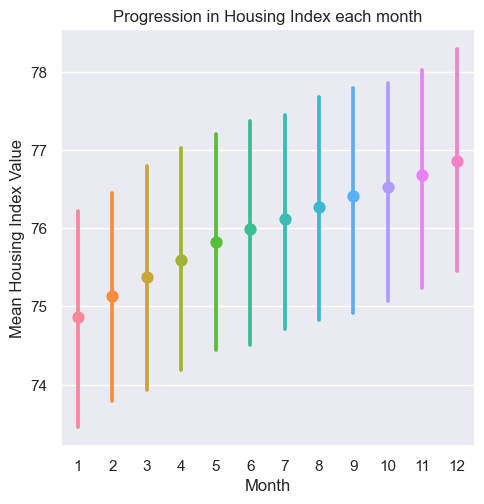

In [100]:
sns.set_palette('colorblind')
g = sns.catplot(data=df_index, x='MONTH', y='VALUE', kind='point', hue='MONTH')
g.set(title='Progression in Housing Index each month', xlabel='Month', ylabel='Mean Housing Index Value')
plt.show()

# Data that shows the highest index value each month touches #

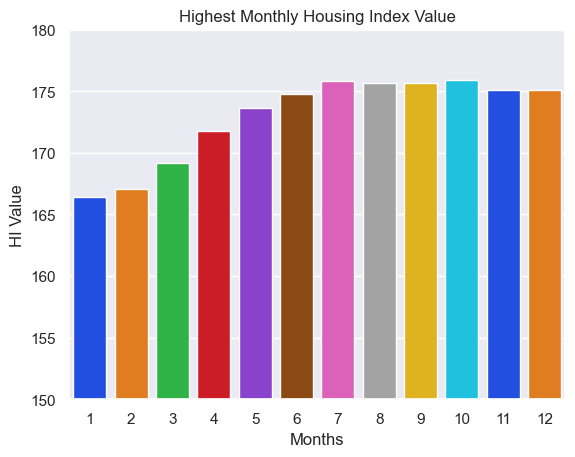

In [101]:
max_values = df_index.groupby('MONTH')['VALUE'].max().reset_index()
colors = sns.color_palette('bright', n_colors=len(max_values))
sns.barplot(x='MONTH', y='VALUE', data=max_values, palette=colors)
plt.title('Highest Monthly Housing Index Value')
plt.xlabel('Months')
plt.ylabel('HI Value')
plt.ylim(150, 180)
plt.show()

# Graph representing the highest value of housing index each place in the Dataset reaches

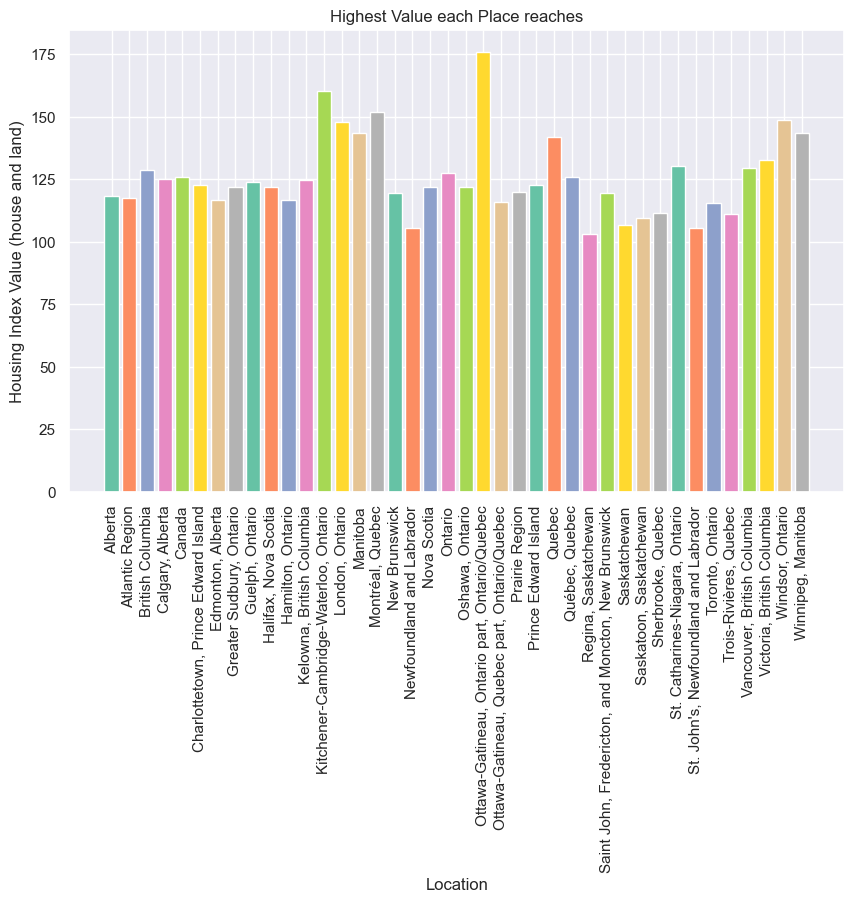

In [102]:
df_max = df_index.groupby('PLACE')['VALUE'].max().reset_index()

# define custom color palette
palette = sns.color_palette("Set2", len(df_max))

plt.figure(figsize=(10, 6))
plt.bar(df_max['PLACE'], df_max['VALUE'], color=palette)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Housing Index Value (house and land)')
plt.title('Highest Value each Place reaches')
plt.show()